## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model


In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUMS = [0.9, 0.95]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
results = {}
for lr in LEARNING_RATE:
    for mome in MOMENTUMS:
        for nes in [True, False]:
            keras.backend.clear_session() # 把舊的 Graph 清掉
            model = build_mlp(input_shape=x_train.shape[1:])
            optimizer = keras.optimizers.SGD(lr=lr, nesterov=nes, momentum=mome)
            model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
            model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_test, y_test), shuffle=True)
    
            # Collect results
            train_loss = model.history.history["loss"]
            valid_loss = model.history.history["val_loss"]
            train_acc = model.history.history["acc"]
            valid_acc = model.history.history["val_acc"]
    
            exp_name_tag = "lr:%s Momentum:%f Nestrov:%s" % (str(lr), mome, nes)
            results[exp_name_tag] = {'train-loss': train_loss, 'valid-loss': valid_loss, 'train-acc': train_acc, 'valid-acc': valid_acc}








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/50





50000/50000 [==============================] - 24s 487us/step - loss: 14.3310 - acc: 0.0997 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 10s 200us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 5s 105us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 5s 107us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 5s 106us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 5s 108us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000

50000/50000 [==============================] - 18s 351us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 38/50
50000/50000 [==============================] - 9s 181us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 39/50
50000/50000 [==============================] - 5s 100us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 40/50
50000/50000 [==============================] - 5s 100us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 41/50
50000/50000 [==============================] - 5s 100us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 42/50
50000/50000 [==============================] - 5s 100us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 43/50
50000/50000 [==============================] - 6s 130us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 44/50
50000/50000 

Epoch 46/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.2358 - acc: 0.5582 - val_loss: 1.6302 - val_acc: 0.4664
Epoch 47/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.2222 - acc: 0.5644 - val_loss: 1.6320 - val_acc: 0.4692
Epoch 48/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.2106 - acc: 0.5657 - val_loss: 1.6009 - val_acc: 0.4703
Epoch 49/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.1992 - acc: 0.5720 - val_loss: 1.5923 - val_acc: 0.4722
Epoch 50/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.1966 - acc: 0.5716 - val_loss: 1.6166 - val_acc: 0.4821
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 140us/step - loss: 2.3103 - acc: 0.1161 - val_loss: 2.1149 - val_acc: 0.1703
Epoch 2/50
50000/50000 [==============================] - 5s 100us/step - loss: 2.1523 - acc: 0.1701 - val_loss: 2.1032 -

50000/50000 [==============================] - 9s 171us/step - loss: 1.9147 - acc: 0.2885 - val_loss: 1.9281 - val_acc: 0.2863
Epoch 5/50
50000/50000 [==============================] - 8s 169us/step - loss: 1.9206 - acc: 0.2817 - val_loss: 1.9293 - val_acc: 0.2643
Epoch 6/50
50000/50000 [==============================] - 8s 168us/step - loss: 1.9398 - acc: 0.2784 - val_loss: 1.9796 - val_acc: 0.2819
Epoch 7/50
50000/50000 [==============================] - 8s 161us/step - loss: 1.9199 - acc: 0.2767 - val_loss: 2.0230 - val_acc: 0.2466
Epoch 8/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.9215 - acc: 0.2822 - val_loss: 1.9107 - val_acc: 0.2701
Epoch 9/50
50000/50000 [==============================] - 8s 163us/step - loss: 1.8757 - acc: 0.3020 - val_loss: 1.8853 - val_acc: 0.2948
Epoch 10/50
50000/50000 [==============================] - 8s 161us/step - loss: 1.9056 - acc: 0.2916 - val_loss: 1.8758 - val_acc: 0.2854
Epoch 11/50
50000/50000 [===================

50000/50000 [==============================] - 6s 128us/step - loss: 1.2176 - acc: 0.5686 - val_loss: 1.3650 - val_acc: 0.5186
Epoch 13/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.1895 - acc: 0.5804 - val_loss: 1.4331 - val_acc: 0.4979
Epoch 14/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.1627 - acc: 0.5890 - val_loss: 1.4157 - val_acc: 0.5188
Epoch 15/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.1437 - acc: 0.5944 - val_loss: 1.3518 - val_acc: 0.5236
Epoch 16/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.1154 - acc: 0.6044 - val_loss: 1.3704 - val_acc: 0.5230
Epoch 17/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.0914 - acc: 0.6130 - val_loss: 1.4404 - val_acc: 0.5060
Epoch 18/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.0689 - acc: 0.6209 - val_loss: 1.4233 - val_acc: 0.5084
Epoch 19/50
50000/50000 [==============

Epoch 21/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.0876 - acc: 0.6131 - val_loss: 1.3397 - val_acc: 0.5272
Epoch 22/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.0665 - acc: 0.6192 - val_loss: 1.3523 - val_acc: 0.5308
Epoch 23/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.0545 - acc: 0.6264 - val_loss: 1.3723 - val_acc: 0.5271
Epoch 24/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.0254 - acc: 0.6342 - val_loss: 1.3582 - val_acc: 0.5279
Epoch 25/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.0064 - acc: 0.6434 - val_loss: 1.4173 - val_acc: 0.5205
Epoch 26/50
50000/50000 [==============================] - 5s 93us/step - loss: 0.9956 - acc: 0.6461 - val_loss: 1.3600 - val_acc: 0.5311
Epoch 27/50
50000/50000 [==============================] - 5s 94us/step - loss: 0.9822 - acc: 0.6501 - val_loss: 1.3482 - val_acc: 0.5384
Epoch 28/50
50000/50000 [=========

Epoch 30/50
50000/50000 [==============================] - 5s 103us/step - loss: 0.7485 - acc: 0.7303 - val_loss: 1.5533 - val_acc: 0.5248
Epoch 31/50
50000/50000 [==============================] - 5s 101us/step - loss: 0.7149 - acc: 0.7454 - val_loss: 1.6810 - val_acc: 0.5107
Epoch 32/50
50000/50000 [==============================] - 5s 102us/step - loss: 0.6985 - acc: 0.7512 - val_loss: 1.5587 - val_acc: 0.5389
Epoch 33/50
50000/50000 [==============================] - 13s 251us/step - loss: 0.6808 - acc: 0.7578 - val_loss: 1.6175 - val_acc: 0.5239
Epoch 34/50
50000/50000 [==============================] - 18s 367us/step - loss: 0.6540 - acc: 0.7678 - val_loss: 1.7033 - val_acc: 0.5166
Epoch 35/50
50000/50000 [==============================] - 9s 183us/step - loss: 0.6428 - acc: 0.7705 - val_loss: 1.6103 - val_acc: 0.5345
Epoch 36/50
50000/50000 [==============================] - 5s 102us/step - loss: 0.6219 - acc: 0.7758 - val_loss: 1.6493 - val_acc: 0.5369
Epoch 37/50
50000/50000 [

50000/50000 [==============================] - 10s 199us/step - loss: 0.8299 - acc: 0.7039 - val_loss: 1.5302 - val_acc: 0.5115
Epoch 39/50
50000/50000 [==============================] - 18s 355us/step - loss: 0.8026 - acc: 0.7120 - val_loss: 1.5384 - val_acc: 0.5156
Epoch 40/50
50000/50000 [==============================] - 11s 222us/step - loss: 0.7809 - acc: 0.7190 - val_loss: 1.5717 - val_acc: 0.5255
Epoch 41/50
50000/50000 [==============================] - 5s 94us/step - loss: 0.7692 - acc: 0.7240 - val_loss: 1.5593 - val_acc: 0.5196
Epoch 42/50
50000/50000 [==============================] - 5s 94us/step - loss: 0.7487 - acc: 0.7296 - val_loss: 1.6113 - val_acc: 0.5273
Epoch 43/50
50000/50000 [==============================] - 5s 93us/step - loss: 0.7259 - acc: 0.7401 - val_loss: 1.6239 - val_acc: 0.5136
Epoch 44/50
50000/50000 [==============================] - 5s 95us/step - loss: 0.7293 - acc: 0.7379 - val_loss: 1.6385 - val_acc: 0.5304
Epoch 45/50
50000/50000 [===============

Epoch 47/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.1346 - acc: 0.5992 - val_loss: 1.3403 - val_acc: 0.5208
Epoch 48/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.1251 - acc: 0.6050 - val_loss: 1.4231 - val_acc: 0.5012
Epoch 49/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.1165 - acc: 0.6066 - val_loss: 1.3665 - val_acc: 0.5203
Epoch 50/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.1098 - acc: 0.6107 - val_loss: 1.4002 - val_acc: 0.5092
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 104us/step - loss: 2.1455 - acc: 0.2324 - val_loss: 1.9903 - val_acc: 0.2932
Epoch 2/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.9157 - acc: 0.3230 - val_loss: 1.8657 - val_acc: 0.3395
Epoch 3/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.8335 - acc: 0.3522 - val_loss: 1.8074 

50000/50000 [==============================] - 5s 106us/step - loss: 1.6167 - acc: 0.4337 - val_loss: 1.6048 - val_acc: 0.4346
Epoch 6/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.5759 - acc: 0.4478 - val_loss: 1.5771 - val_acc: 0.4456
Epoch 7/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.5417 - acc: 0.4592 - val_loss: 1.5447 - val_acc: 0.4537
Epoch 8/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.5104 - acc: 0.4692 - val_loss: 1.5184 - val_acc: 0.4585
Epoch 9/50
50000/50000 [==============================] - 6s 110us/step - loss: 1.4827 - acc: 0.4789 - val_loss: 1.4991 - val_acc: 0.4728
Epoch 10/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.4573 - acc: 0.4872 - val_loss: 1.4843 - val_acc: 0.4767
Epoch 11/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.4346 - acc: 0.4951 - val_loss: 1.4762 - val_acc: 0.4770
Epoch 12/50
50000/50000 [==================

Epoch 14/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.4093 - acc: 0.5036 - val_loss: 1.4618 - val_acc: 0.4770
Epoch 15/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.3868 - acc: 0.5116 - val_loss: 1.4410 - val_acc: 0.4825
Epoch 16/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.3671 - acc: 0.5180 - val_loss: 1.4237 - val_acc: 0.4913
Epoch 17/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.3558 - acc: 0.5218 - val_loss: 1.4131 - val_acc: 0.4998
Epoch 18/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.3319 - acc: 0.5297 - val_loss: 1.4044 - val_acc: 0.5036
Epoch 19/50
50000/50000 [==============================] - 12s 245us/step - loss: 1.3240 - acc: 0.5315 - val_loss: 1.3857 - val_acc: 0.5068
Epoch 20/50
50000/50000 [==============================] - 14s 280us/step - loss: 1.3077 - acc: 0.5380 - val_loss: 1.3986 - val_acc: 0.5094
Epoch 21/50
50000/50000 [=

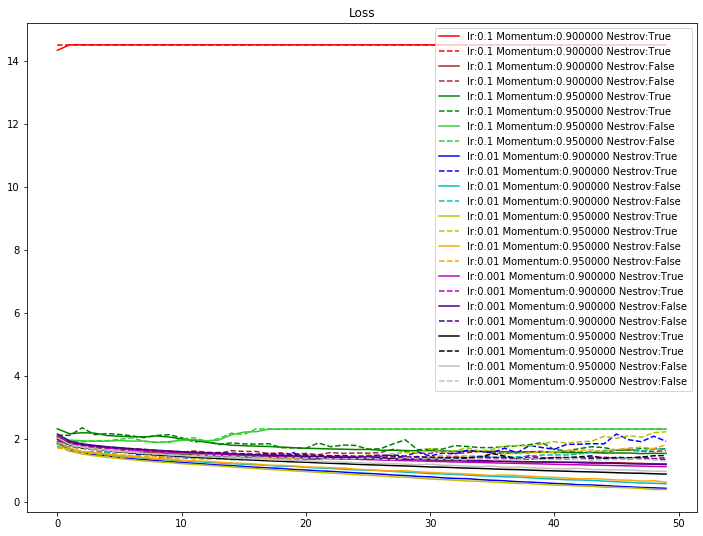

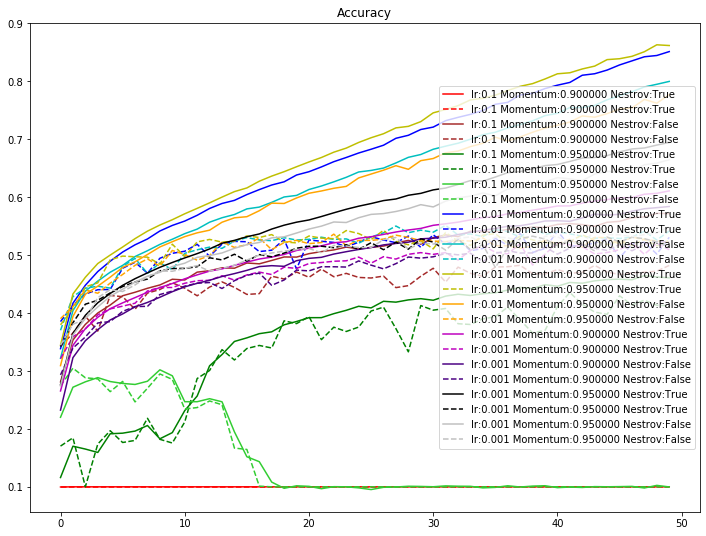

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

color_bar = ["r", "brown", "g", "limegreen", "b", "c", "y", "orange", "m", "indigo", "k", "silver"]

plt.figure(figsize=(12,9))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(12,9))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()